In [339]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [340]:
def correlacion_pearson(data_frame, columna1, columna2):
    return np.corrcoef(data_frame[columna1], data_frame[columna2])[0,1];

# Experimentos del TP de Jambotubo
En esta carpeta de Jupyer vamos a poner lo relativo a realizar la experimentación computacional.
- **Asegurarse de correr los experimentos en el notebook Experimentos antes de utilizar este notebook.**
- En este archivo se lee el output de los experimentos y se muestra de manera gráfica esos resultados.

# Datasets
Para los experimentos se crean las siguientes familias de instancias para evaluar los distintos métodos.


1. **entran-muchos-BT**: Instancias en las que entran muchos elementos en el Jambotubo. Casos razonablemente buenos para backtracking con poda de optimalidad y malos para backtracking con poda de factibilidad.
2. **entran-pocos-BT**: Instancias en las que entran pocos elementos en el Jambotubo. Casos razonablemente buenos para backtracking con poda de factibilidad y malos para backtracking con poda de optimalidad.
3. **mejor-caso-BT-O**: Instancias en las que entran todos los elementos en el Jambotubo. Mejor caso para backtracking con poda de optimalidad y peor caso para backtracking con poda de factibilidad.
4. **mejor-caso-BT-F**: Instancias en las que no entra ninguno de los elementos en el Jambotubo. Mejor caso para backtracking con poda de factibilidad y peor caso para backtracking con poda de optimalidad.
5. **peor-caso-BT**: Instancias en las que entran aproximadamente la mitad de los elementos en el Jambotubo, generando malos casos para backtracking.
6. **mejor-caso-DP**: Instancias en las que hay mucha superposición de problemas, generando buenos casos para programación dinámica, también se varía la resistencia del tubo. 
7. **peor-caso-DP**: Instancias en las que hay mínima superposición de problemas, generando malos casos para programación dinámica.



# Métodos
Los métodos evaluados en este notebook son los siguientes:
- **FB**: Fuerza Bruta.
- **BT**: Backtracking con podas por optimalidad y factibilidad.
- **BT-F**: Backtracking solamente con poda por factibilidad.
- **BT-B**: Backtracking solamente con poda por optimalidad.
- **DP**: Programación dinámica.

# Experimentos
Leemos el dataframe con todos los resultados.

In [341]:
df_resultados = pd.read_csv("resultados/resultado.csv");
df_resultados.head()

,dataset,n,resTubo,metodo,tiempo
0,peor-caso-BT,1,9,FB,0.000726
1,peor-caso-BT,2,18,FB,0.000731
2,peor-caso-BT,3,29,FB,0.000764
3,peor-caso-BT,4,37,FB,0.000823
4,peor-caso-BT,5,45,FB,0.000889


## Experimento 1: Complejidad de Fuerza Bruta
En este experimento evaluamos el método FB con los datasets muchos, pocos e intermedios elementos en el jambotubo. La hipótesis es que siempre va a tener un comportamiento exponencial porque tiene peor y mejor caso iguales.

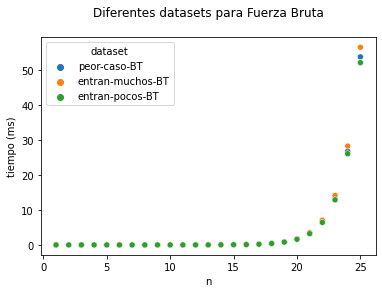

In [342]:
# Graficamos los tiempos de ejecución de distintas instancias para Fuerza Bruta en función de n.
df_complejidad_FB = df_resultados[df_resultados["metodo"]=="FB"].copy();
fig = sns.scatterplot(data=df_complejidad_FB, x='n', y='tiempo', hue='dataset');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.title("Diferentes datasets para Fuerza Bruta\n")
plt.savefig("graficos/fb-datasets.svg", bbox_inches = 'tight');

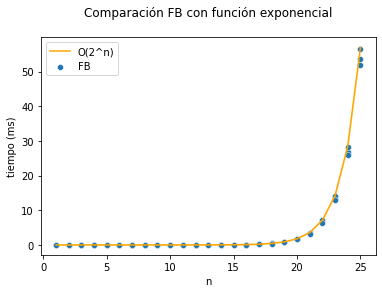

In [343]:
# Comparamos los tiempos de ejecución de Fuerza Bruta contra una función exponencial.
df_complejidad_FB = df_resultados[(df_resultados["metodo"]=="FB")].copy();
df_complejidad_FB["tiempo_esperado"] = 2. ** df_complejidad_FB["n"] * 0.0000017; # Exponencial
fig = sns.scatterplot(data=df_complejidad_FB, x='n', y='tiempo');
fig = sns.lineplot(data=df_complejidad_FB, x='n', y='tiempo_esperado', color="orange");
fig.legend(labels=['O(2^n)','FB']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.title("Comparación FB con función exponencial\n")
plt.savefig("graficos/fb-complejidad.svg", bbox_inches = 'tight')

Índice de correlación de Pearson: 0.9993467960738377


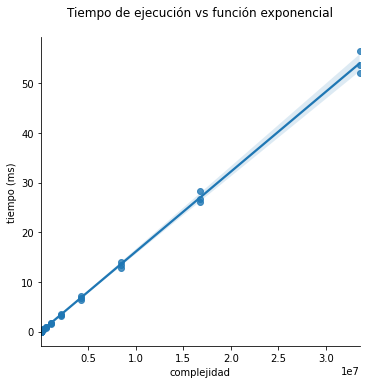

In [344]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_complejidad_FB = df_resultados[(df_resultados["metodo"]=="FB")].copy();
df_complejidad_FB["complejidad"] = 2.0 ** df_complejidad_FB["n"];
fig = sns.lmplot(data=df_complejidad_FB, x="complejidad", y="tiempo");
fig.set(xlabel='complejidad', ylabel='tiempo (ms)');
plt.title("Tiempo de ejecución vs función exponencial\n")
plt.savefig("graficos/fb-correlacion.svg", bbox_inches = 'tight');
print("Índice de correlación de Pearson:", correlacion_pearson(df_complejidad_FB, "tiempo", "complejidad"));

## Experimento 2: Complejidad de Backtracking
En este experimento evaluamos el método BT en mejores casos para ambas podas(ninguno/todos) y en casos donde ninguna de ellas tiene buena performance (casos intermedios). 

Esperamos que los casos óptimos para las podas tengan una complejidad temporal lineal y aquellos casos en que ambas tengan mal rendimiento el orden temporal sea exponencial.

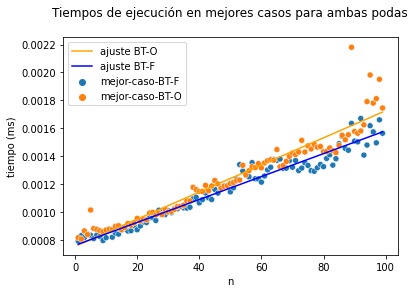

In [345]:
# Corremos los mejores casos para cada poda.
# Generamos un ajuste lineal para los tiempos de ejecución, demostrando su complejidad lineal.
df_BT = df_resultados[((df_resultados["metodo"]== "BT") & ( (df_resultados["dataset"] == "mejor-caso-BT-O") | (df_resultados["dataset"] == "mejor-caso-BT-F") ) )].copy()

ajuste_todos = LinearRegression()
df_BT_todos  = df_BT[df_BT["dataset"] == "mejor-caso-BT-O"].copy()
X = np.array(df_BT_todos ["n"]).reshape(-1, 1)
y = np.array(df_BT_todos ["tiempo"])
ajuste_todos.fit(X,y)
estimated = [ajuste_todos.intercept_, ajuste_todos.coef_]
df_BT_todos["tiempoEstimado"] = estimated[0] + np.array(df_BT_todos["n"])*estimated[1]

ajuste_ninguno = LinearRegression()
df_BT_ninguno  = df_BT[df_BT["dataset"] == "mejor-caso-BT-F"].copy()
X = np.array(df_BT_ninguno["n"]).reshape(-1, 1)
y = np.array(df_BT_ninguno["tiempo"])
ajuste_ninguno.fit(X,y)
estimated = [ajuste_ninguno.intercept_, ajuste_ninguno.coef_]
df_BT_ninguno["tiempoEstimado"] = estimated[0] + np.array(df_BT_ninguno["n"])*estimated[1]

fig = sns.scatterplot(data=df_BT, x='n', y='tiempo', hue='dataset');

fig = sns.lineplot(data=df_BT_todos, x='n', y="tiempoEstimado", color="orange", label= "ajuste BT-O");

fig = sns.lineplot(data=df_BT_ninguno, x='n', y='tiempoEstimado', color='blue', label= "ajuste BT-F")
#plt.ylim(0.00125, 0.003)
plt.legend(loc = "best")
plt.title("Tiempos de ejecución en mejores casos para ambas podas\n")
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-complejidad-mejor-caso.svg", bbox_inches = 'tight');

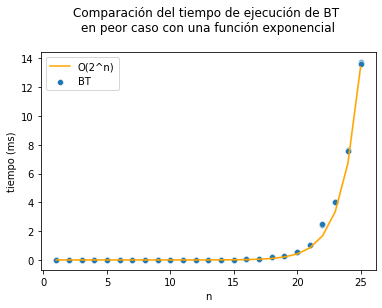

In [346]:
# Comparación de tiempo de ejecución en peores casos con una función exponencial
df_BT_peor_caso = df_resultados[(df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "peor-caso-BT")].copy();
df_BT_peor_caso["tiempo_esperado"] = 2 ** df_BT_peor_caso["n"] * 0.0000004; # Exponencial.
fig = sns.scatterplot(data=df_BT_peor_caso, x='n', y='tiempo');
fig = sns.lineplot(data=df_BT_peor_caso, x='n', y='tiempo_esperado', color="orange");
fig.legend(labels=['O(2^n)','BT']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.title("Comparación del tiempo de ejecución de BT \nen peor caso con una función exponencial\n")
plt.savefig("graficos/bt-complejidad-peor-caso.svg", bbox_inches = 'tight');

Índice de correlación de Pearson: 0.9542568300816514


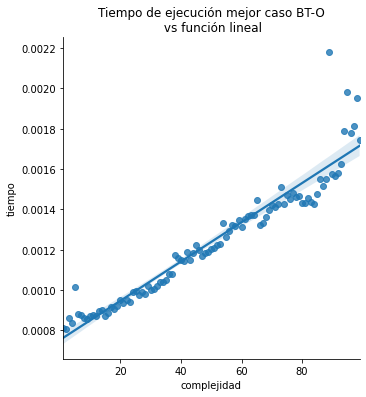

In [347]:
# Graficamos los tiempos de ejecución del mejor caso para poda de optimalidad vs la complejidad esperada (lineal)
df_BT_mejor_caso = df_resultados[((df_resultados["metodo"]== "BT") & ( (df_resultados["dataset"] == "mejor-caso-BT-O")))].copy()
df_BT_mejor_caso["complejidad"] = df_BT_mejor_caso["n"];
fig = sns.lmplot(data=df_BT_mejor_caso, x="complejidad", y="tiempo");
plt.title("Tiempo de ejecución mejor caso BT-O\n vs función lineal")
plt.savefig("graficos/bt-correlacion-mejor-caso-optimalidad.svg", bbox_inches = 'tight');
print("Índice de correlación de Pearson:", correlacion_pearson(df_BT_mejor_caso, "tiempo", "complejidad"));


Índice de correlación de Pearson: 0.9764778426527932


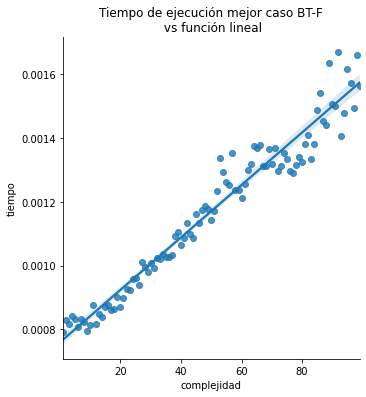

In [348]:
# Graficamos los tiempos de ejecución del mejor caso para poda de factibilid vs la complejidad esperada (lineal)
df_BT_mejor_caso = df_resultados[((df_resultados["metodo"]== "BT") & ( (df_resultados["dataset"] == "mejor-caso-BT-F")))].copy()
df_BT_mejor_caso["complejidad"] = df_BT_mejor_caso["n"];
fig = sns.lmplot(data=df_BT_mejor_caso, x="complejidad", y="tiempo");
plt.title("Tiempo de ejecución mejor caso BT-F\n vs función lineal")
plt.savefig("graficos/bt-correlacion-mejor-caso-factibilidad.svg", bbox_inches = 'tight');
print("Índice de correlación de Pearson:", correlacion_pearson(df_BT_mejor_caso, "tiempo", "complejidad"));

Índice de correlación de Pearson: 0.9975702660312037


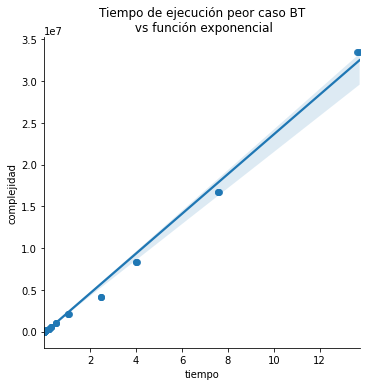

In [349]:
# Graficamos los tiempos de ejecución de BT en peor caso vs la complejidad esperada (exponencial).
df_BT_peor_caso = df_resultados[((df_resultados["metodo"]== "BT") & ( (df_resultados["dataset"] == "peor-caso-BT")))].copy()
df_BT_peor_caso["complejidad"] = 2 ** df_BT_peor_caso["n"];
fig = sns.lmplot(data=df_BT_peor_caso, x="tiempo", y="complejidad");
plt.title("Tiempo de ejecución peor caso BT\n vs función exponencial")
plt.savefig("graficos/bt-correlacion-peor-caso.svg", bbox_inches = 'tight');
print("Índice de correlación de Pearson:", correlacion_pearson(df_BT_peor_caso, "tiempo", "complejidad"));

## Experimento 3: Análisis de las podas
Analizamos comparativamente Backtracking con cada una de sus podas y con ambas para los datasets que se comportan de forma óptima/mala para cada poda y para aquel en el cual ninguna de las podas se comporta eficientemente. 

Esperamos que para los casos en los que alguna poda es óptima, la complejidad temporal sea lineal cuando esta se aplica. Dado que los casos óptimos para una poda son los peores para la otra, esperamos que cuando una poda se enfrenta a su peor caso la complejidad temporal sea exponencial. De la misma forma en todos los casos se espera una complejidad exponencial ante el set de instancias medias (peor caso para BT).


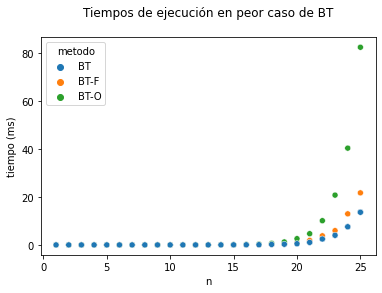

In [350]:
# Gráfico de tiempos de ejecución de todas las variantes contra el peor caso de BT.
df_BT_peor_caso = df_resultados[((df_resultados["metodo"]=="BT") | (df_resultados["metodo"]=="BT-F") | (df_resultados["metodo"]=="BT-O")) & (df_resultados["dataset"] == "peor-caso-BT")].copy();
fig = sns.scatterplot(data=df_BT_peor_caso, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.title("Tiempos de ejecución en peor caso de BT\n")
plt.savefig("graficos/bt-peor-caso.svg", bbox_inches = 'tight');

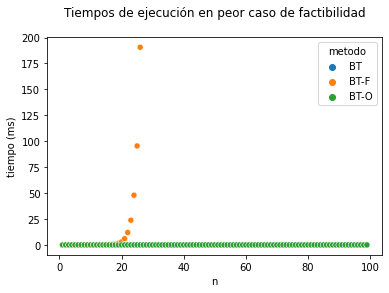

In [351]:
# Gráfico de tiempos de ejecución de todas las variantes contra el mejor caso para optimalidad/peor caso para factibilidad
df_BT_O = df_resultados[((df_resultados["metodo"]=="BT") | (df_resultados["metodo"]=="BT-F") | (df_resultados["metodo"]=="BT-O")) & (df_resultados["dataset"] == "mejor-caso-BT-O")].copy();
fig = sns.scatterplot(data=df_BT_O, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.title("Tiempos de ejecución en peor caso de factibilidad\n")
plt.savefig("graficos/bt-peor-caso-factibilidad.svg", bbox_inches = 'tight');

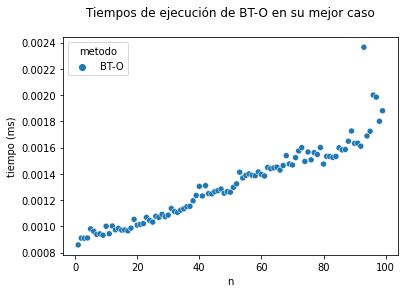

In [352]:
# Quitamos del gráfico anterior la poda por factibilidad para apreciar la linealidad de la poda por optimalidad
df_BT_O_solo = df_resultados[((df_resultados["metodo"]=="BT-O")) & (df_resultados["dataset"] == "mejor-caso-BT-O")].copy();
fig = sns.scatterplot(data=df_BT_O_solo, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.title("Tiempos de ejecución de BT-O en su mejor caso\n")
plt.savefig("graficos/bt-mejor-caso-optimalidad.svg", bbox_inches = 'tight');

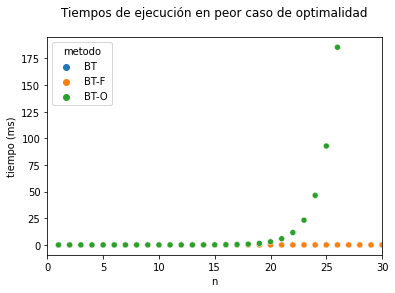

In [353]:
# Gráfico de tiempos de ejecución de todas las variantes contra el mejor caso para factibilidad/peor caso para optimalidad
df_BT_F = df_resultados[((df_resultados["metodo"]=="BT") | (df_resultados["metodo"]=="BT-F") | (df_resultados["metodo"]=="BT-O")) & (df_resultados["dataset"] == "mejor-caso-BT-F")].copy();
fig = sns.scatterplot(data=df_BT_F, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.xlim(0, 30)
plt.title("Tiempos de ejecución en peor caso de optimalidad\n")
plt.savefig("graficos/bt-peor-caso-optimalidad.svg", bbox_inches = 'tight');

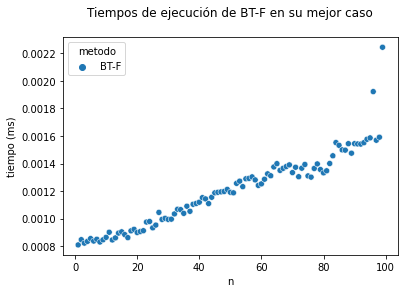

In [354]:
# Quitamos del gráfico anterior la poda por optimalidad para apreciar la linealidad de la poda por factibilidad
df_BT_F_solo = df_resultados[((df_resultados["metodo"]=="BT-F")) & (df_resultados["dataset"] == "mejor-caso-BT-F")].copy();
fig = sns.scatterplot(data=df_BT_F_solo, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.title("Tiempos de ejecución de BT-F en su mejor caso\n")
plt.savefig("graficos/bt-mejor-caso-factibilidad.svg", bbox_inches = 'tight');

## Experimento 4: Complejidad de programación dinámica
En este experimento analizamos el tiempo de ejecución del algoritmo de programación dinámica y lo comparamos con su cota teórica para ver si en la práctica se comporta de manera similar.

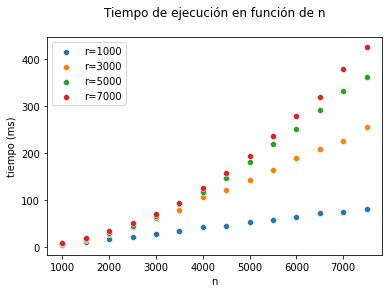

In [355]:
# Graficamos la evolución del tiempo de ejecución en función de n, con cortes en distintos resTubo.
df_dinamica_M = df_resultados[(df_resultados["metodo"]=="DP") & (df_resultados["dataset"]=="mejor-caso-DP")].copy();
df_dinamica_M["n*r"] = df_dinamica_M["n"]*df_dinamica_M["resTubo"]
fig = sns.scatterplot(data=df_dinamica_M[df_dinamica_M["resTubo"]==1000], x='n', y='tiempo');
fig = sns.scatterplot(data=df_dinamica_M[df_dinamica_M["resTubo"]==3000], x='n', y='tiempo');
fig = sns.scatterplot(data=df_dinamica_M[df_dinamica_M["resTubo"]==5000], x='n', y='tiempo');
fig = sns.scatterplot(data=df_dinamica_M[df_dinamica_M["resTubo"]==7000], x='n', y='tiempo');
fig.legend(labels=['r=1000','r=3000','r=5000', "r=7000"]);
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.title("Tiempo de ejecución en función de n\n")
plt.savefig("graficos/dp-varia-r.svg", bbox_inches = 'tight');

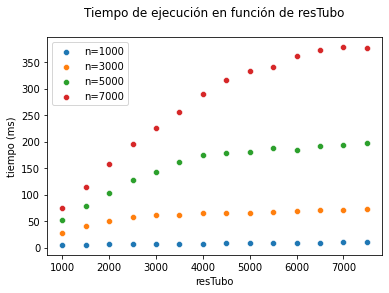

In [356]:
# Graficamos la evolución del tiempo de ejecución en función de resTubo, con cortes en distintos n.
fig = sns.scatterplot(data=df_dinamica_M[df_dinamica_M["n"]==1000], x='resTubo', y='tiempo');
fig = sns.scatterplot(data=df_dinamica_M[df_dinamica_M["n"]==3000], x='resTubo', y='tiempo');
fig = sns.scatterplot(data=df_dinamica_M[df_dinamica_M["n"]==5000], x='resTubo', y='tiempo');
fig = sns.scatterplot(data=df_dinamica_M[df_dinamica_M["n"]==7000], x='resTubo', y='tiempo');
fig.legend(labels=['n=1000','n=3000','n=5000','n=7000']);
fig.set(xlabel='resTubo', ylabel='tiempo (ms)');
plt.title("Tiempo de ejecución en función de resTubo\n")
plt.savefig("graficos/dp-varia-n.svg", bbox_inches = 'tight');

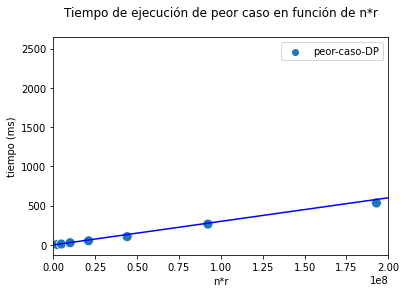

In [357]:
# Graficamos la evolución del tiempo de ejecución en función de n*r, para el peor caso.
df_dinamica_P = df_resultados[(df_resultados["metodo"]=="DP") & (df_resultados["dataset"] == "peor-caso-DP")].copy();
df_dinamica_P["n*r"] = df_dinamica_P["n"]*df_dinamica_P["resTubo"]
#fig = sns.scatterplot(data=df_dinamica, x='n*r', y='tiempo');
fig = sns.scatterplot(data=df_dinamica_P, x='n*r', y='tiempo', hue = "dataset", s = 100);
m = 0.000003
df_dinamica_P["tiempoEstimado"] = m*df_dinamica_P["n*r"]
fig = sns.lineplot(data=df_dinamica_P, x='n*r', y='tiempoEstimado', color='blue')
plt.xlim(0, 2e8)
#plt.ylim(0, 0.014)
fig.set(xlabel='n*r', ylabel='tiempo (ms)');
plt.title("Tiempo de ejecución de peor caso en función de n*r\n")
plt.savefig("graficos/dp-peor-caso.svg", bbox_inches = 'tight');

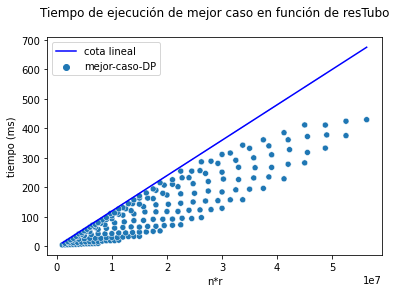

In [361]:
# Graficamos el tiempo de ejecución de mejor caso en funcion de n*r
df_dinamica_M["n*r"] = df_dinamica_M["n"]*df_dinamica_M["resTubo"]
colx = "n*r"
fig = sns.scatterplot(data=df_dinamica_M, x=colx, y='tiempo', hue = "dataset");
m = 0.000012
df_dinamica_M["tiempoEstimado"] = m*df_dinamica_M["n*r"]
fig = sns.lineplot(data=df_dinamica_M, x=colx, y='tiempoEstimado', color='blue', label = "cota lineal")
fig.set(xlabel=colx, ylabel='tiempo (ms)');
plt.title("Tiempo de ejecución de mejor caso en función de resTubo\n")
plt.savefig("graficos/dp-mejor-caso.svg", bbox_inches = 'tight');

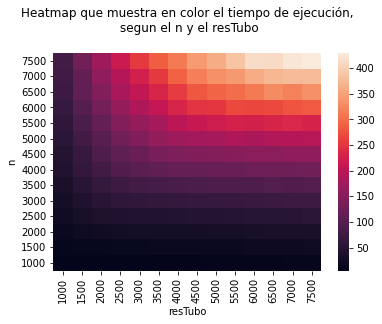

In [362]:
# Heatmap del tiempo de ejecución donde las filas representan el n y las columnas el resTubo

df_heatmap = df_dinamica_M.pivot_table(index='n', columns='resTubo', values='tiempo', aggfunc=np.mean);
fig = sns.heatmap(df_heatmap);
fig.invert_yaxis();
plt.title("Heatmap que muestra en color el tiempo de ejecución,\n segun el n y el resTubo\n")
plt.savefig("graficos/dp-heatmap.svg", bbox_inches = 'tight');

## Experimento 5: Comparación Backtacking y Programación Dinámica
En este experimento se trata de buscar para qué casos funciona mejor cada técnica para lo que vamos a ejecutar backtracking y programación dinámica  sobre diversos datasets.

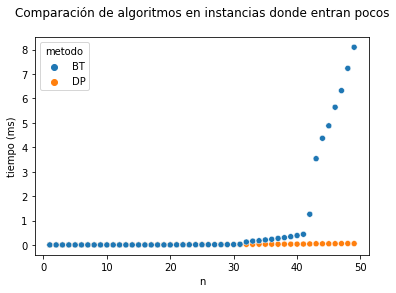

In [310]:
# En el dataset "entran pocos" comparo rendimiento de DP contra BT
df_pocos_BT_DP = df_resultados[((df_resultados["metodo"]=="BT") | (df_resultados["metodo"]=="DP")) & (df_resultados["dataset"] == "entran-pocos-BT")].copy();

fig = sns.scatterplot(data=df_pocos_BT_DP, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.title("Comparación de algoritmos en instancias donde entran pocos\n")
plt.savefig("graficos/comparacion-bt-entran-pocos.svg", bbox_inches = 'tight');

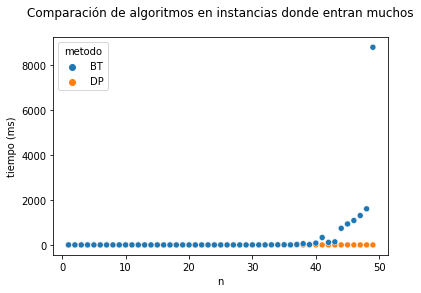

In [311]:
# En el dataset "entran muchos" comparo rendimiento de DP contra BT
df_muchos_BT_DP = df_resultados[((df_resultados["metodo"]=="BT") | (df_resultados["metodo"]=="DP")) & (df_resultados["dataset"] == "entran-muchos-BT")].copy();

fig = sns.scatterplot(data=df_muchos_BT_DP, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.title("Comparación de algoritmos en instancias donde entran muchos\n")
#plt.ylim(0, 2)
plt.savefig("graficos/comparacion-bt-dp-entran-muchos.svg", bbox_inches = 'tight');

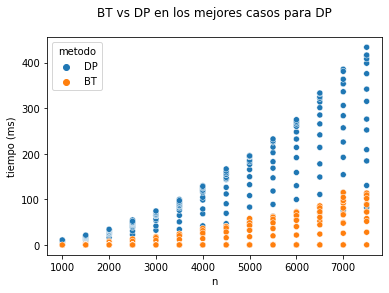

In [290]:
#Comparo rendimiento para el dataset "mejor caso dp". Se espera que cuando se trate de instancias en que entran todos los elementos backtracking funcione mejor (por poda de optimalidad)
df_dinamicaBTDP_M = df_resultados[((df_resultados["metodo"]=="BT") | (df_resultados["metodo"]=="DP")) & (df_resultados["dataset"] == "mejor-caso-DP")].copy();

fig = sns.scatterplot(data=df_dinamicaBTDP_M, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.title("BT vs DP en los mejores casos para DP\n")
plt.savefig("graficos/comparacion-bt-dp-mejor-caso-dp.svg", bbox_inches = 'tight');

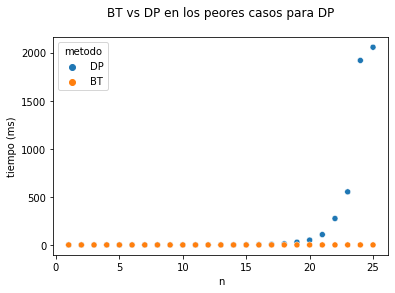

In [312]:
#Comparo rendimiento para el dataset "peor caso dp", nótese que es un dataset del tipo "entran todos" por lo que se espera muy buena performance de backtracking (por poda de optimalidad).
df_dinamicaBTDP_M = df_resultados[((df_resultados["metodo"]=="BT") | (df_resultados["metodo"]=="DP")) & (df_resultados["dataset"] == "peor-caso-DP")].copy();

fig = sns.scatterplot(data=df_dinamicaBTDP_M, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.title("BT vs DP en los peores casos para DP\n")
plt.savefig("graficos/comparacion-bt-dp-peor-caso-dp.svg", bbox_inches = 'tight');